# Import neassary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BankChurners.csv')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
df = df.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
             'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
            axis=1)

# Exploratory data analysis

## Checking for null values

In [4]:
df.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There were no Null values in the dataset

## Analysis on responce variable

([<matplotlib.patches.Wedge at 0x23051c74250>,
 [Text(-0.9628371444551311, 0.5319254019667504, 'Existing Customer'),
  Text(0.9628371693563555, -0.5319253568930898, 'Attrited Customer')],
 [Text(-0.525183896975526, 0.29014112834550015, '84%'),
  Text(0.5251839105580121, -0.2901411037598671, '16%')])

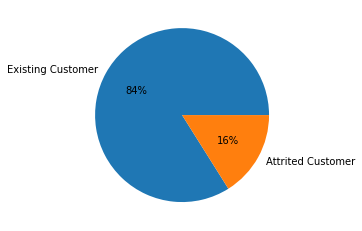

In [5]:
plt.pie(x=df.Attrition_Flag.value_counts(), labels =df.Attrition_Flag.unique(),autopct='%0.0f%%')

The response variable churn has an unbalanced distribution of data, where the ratio between attrited and existing customers is <b>84:16</b>. This could affect the model's performance since the algorithm receives disproportionately more samples from one class, causing it to be biased towards that particular class. so we need to aply some sampling techniques on the dataset before training the model

## Qualitative variables

([<matplotlib.patches.Wedge at 0x23053d40370>,
 [Text(0.6214968632677306, 0.9076021424326697, 'High School'),
  Text(-0.922280434335642, 0.5994987910260201, 'Graduate'),
  Text(-0.9549794425143646, -0.5459068275584704, 'Uneducated'),
  Text(-0.13055766118915335, -1.0922246550526218, 'Unknown'),
  Text(0.6714521883201451, -0.8712932679644029, 'College'),
  Text(0.995277765378892, -0.4684252018651424, 'Post-Graduate'),
  Text(1.0892515519913137, -0.15339835880645664, 'Doctorate')],
 [Text(0.3389982890551257, 0.4950557140541834, '31%'),
  Text(-0.5030620550921683, 0.3269993405596473, '20%'),
  Text(-0.520897877735108, -0.29776736048643837, '15%'),
  Text(-0.07121326973953819, -0.5957589027559754, '15%'),
  Text(0.36624664817462455, -0.47525087343512873, '10%'),
  Text(0.5428787811157592, -0.25550465556280494, '5%'),
  Text(0.5941372101770802, -0.08367183207624906, '4%')])

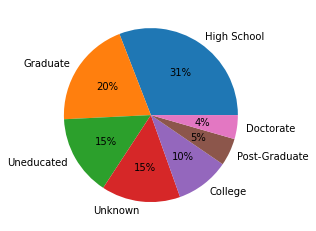

In [6]:
colors = sns.color_palette('dark')
plt.pie(df.Education_Level.value_counts(), labels=df.Education_Level.unique(),autopct='%0.0f%%')

Despite the fact that the dataset has no null values, certain categorical variables have "unknown" as one of the categories, which is basically a null value. Almost <b>15%</b> of the customer’s education level is unknown, which is a huge number. It could have a significant impact on the model that to be trained.  Since the dataset is fairly large, should check whether removing those rows would have a significant affect or not on the model .

In [7]:
cat_features = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [8]:
df.groupby('Attrition_Flag')['Education_Level'].value_counts()


Attrition_Flag     Education_Level
Attrited Customer  Graduate            487
                   High School         306
                   Unknown             256
                   Uneducated          237
                   College             154
                   Doctorate            95
                   Post-Graduate        92
Existing Customer  Graduate           2641
                   High School        1707
                   Unknown            1263
                   Uneducated         1250
                   College             859
                   Post-Graduate       424
                   Doctorate           356
Name: Education_Level, dtype: int64

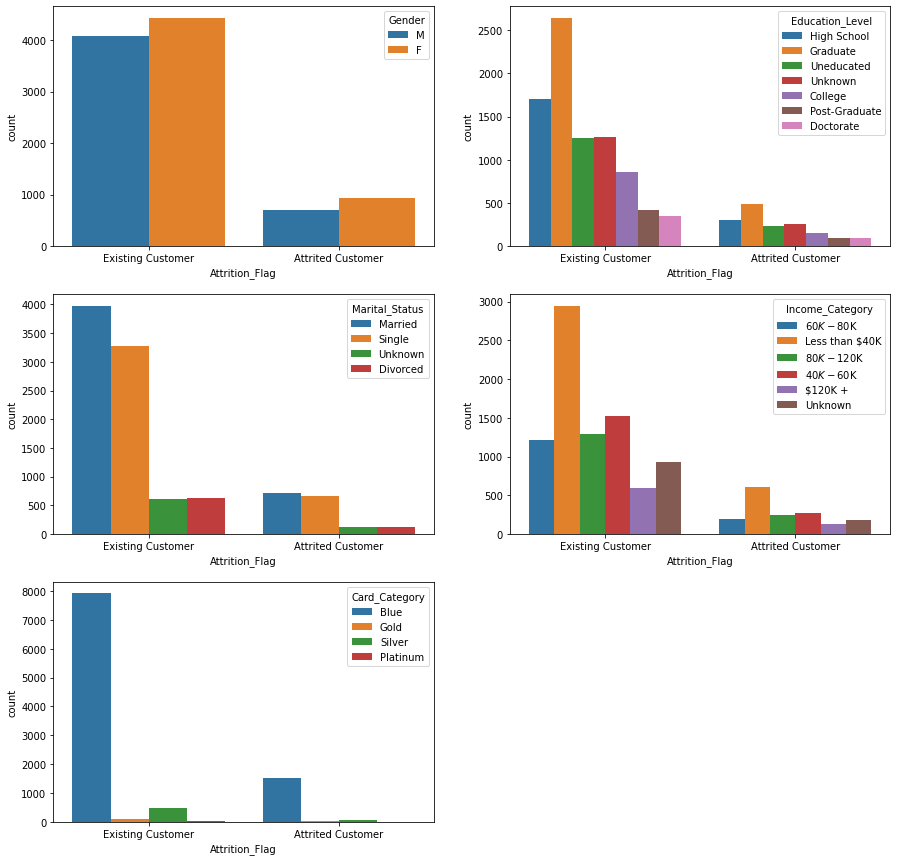

In [9]:
plt.figure(figsize=(15,15))
a = 3
b = 2
c = 1

for feature in cat_features:
    plt.subplot(a,b,c)
    cat = df[feature].unique()
    count = df[feature].value_counts()
    sns.countplot(hue=df[feature],x=df.Attrition_Flag)
    c=c+1
    
plt.show()

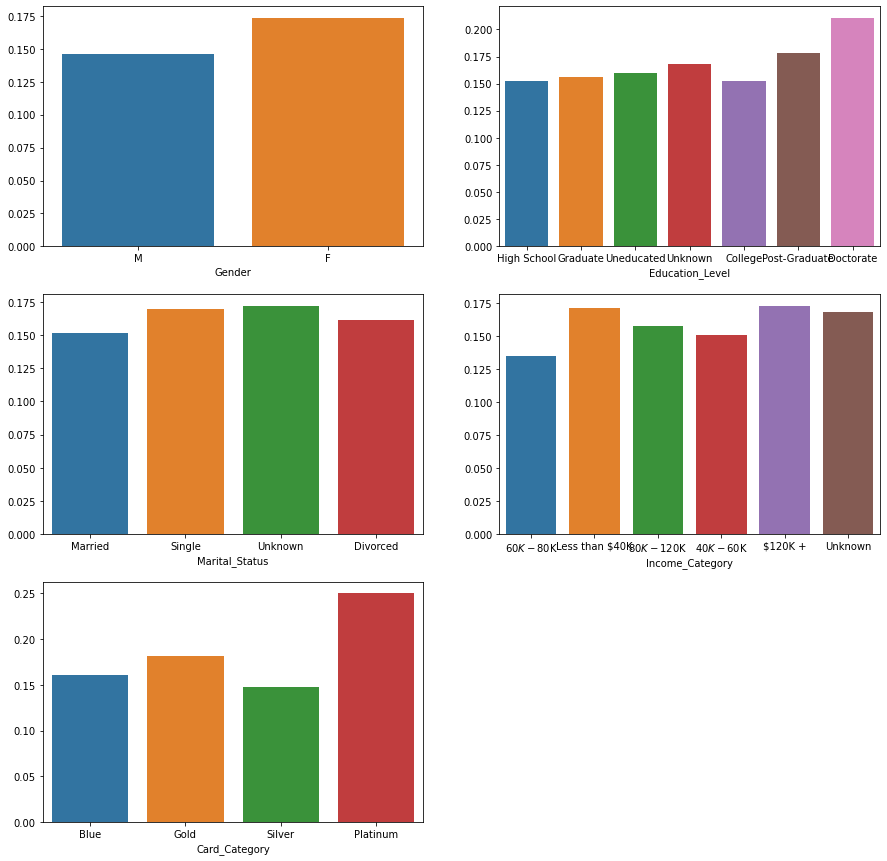

In [10]:
plt.figure(figsize=(15,15))
a = 3
b = 2
c = 1

for feature in cat_features:
    plt.subplot(a,b,c)
    cat = df[feature]
    attributes = cat.unique()
    per = []
    for level in attributes:
        percentage = len(df[(df.Attrition_Flag == 'Attrited Customer') & (df[feature] == level)])/len(df[df[feature] == level])
        per.append(percentage)
    sns.barplot(x=attributes, y=per)
    plt.xlabel(feature)
    c=c+1
    
plt.show()

The above plot shows the percentage of attrite customers of the different categories in a categorical variable. According to the plot, females are more likely than males to cancel their credit card services, and as an obvious fact, consumers with annual incomes of less than $40k are more likely to cancel their credit card services. Surprisingly, platinum cardholders have a much higher likelihood of abandoning their credit card service than other card holders. The highest proportion of attrited customers under educational level belongs to Doctorate level.

## Quantitative variables

In [11]:
num_features = []

for variable in df.columns:
    if (df[variable].dtypes) != 'O':
        num_features.append(variable)

num_features

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [12]:
remove_list = ['Dependent_count','Total_Relationship_Count','Months_Inactive_12_mon',
                    'Contacts_Count_12_mon']
for ele in remove_list:
    print(ele)
    num_features.remove(ele)


Dependent_count
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon


### Distribution

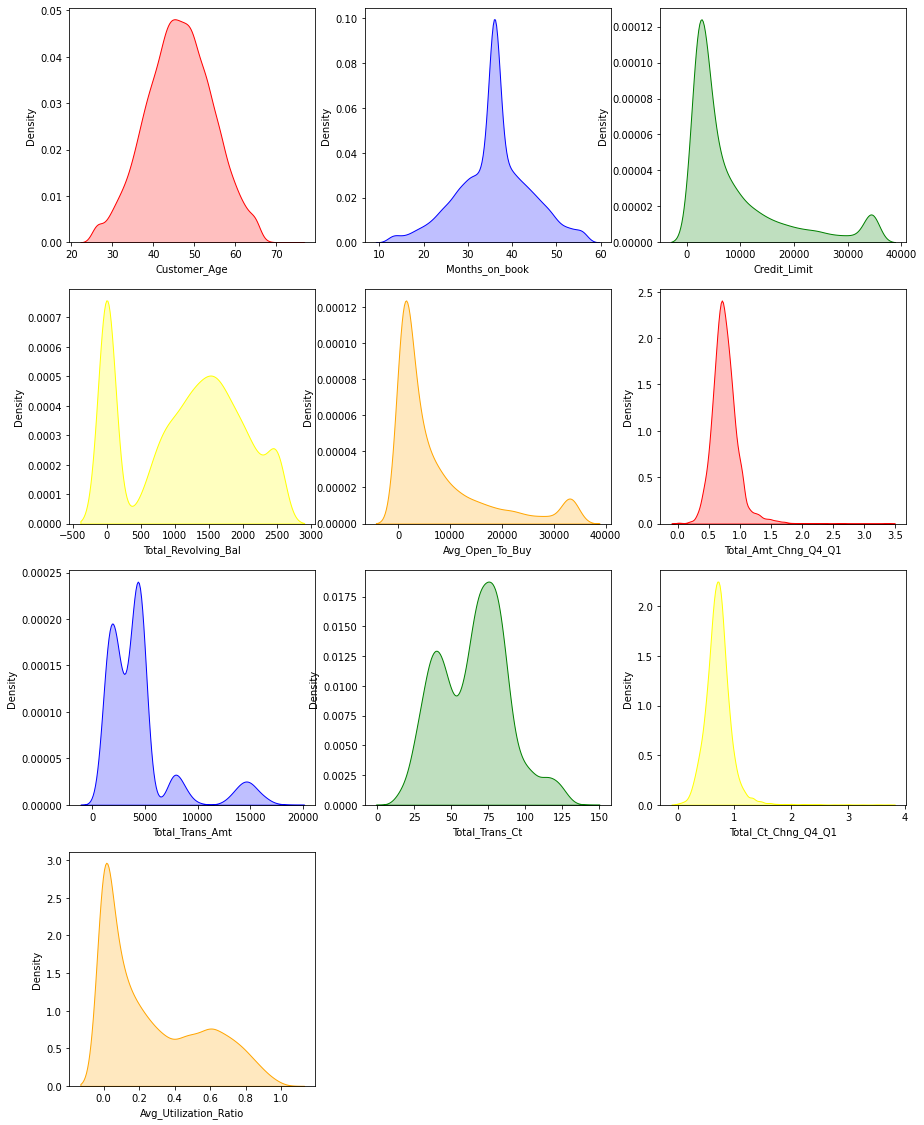

In [13]:
plt.figure(figsize=(15,25))
a = 5
b = 3
c = 1

colors = ['red' ,'blue', 'green','yellow', 'orange', 
          'red' ,'blue', 'green','yellow', 'orange']
for i,feature in enumerate(num_features):
    plt.subplot(a,b,c)
    ax = sns.kdeplot(x =df[feature], fill=True, color=colors[i])
    c = c+1
    
plt.show()

Distributions of customer_Age and Months_on_book are approximately symmetric. But some of other numeric variables contain skewness. In the preprocessing phase, we'll have to do some transformation process to change this skewed data to a normally distributed data.

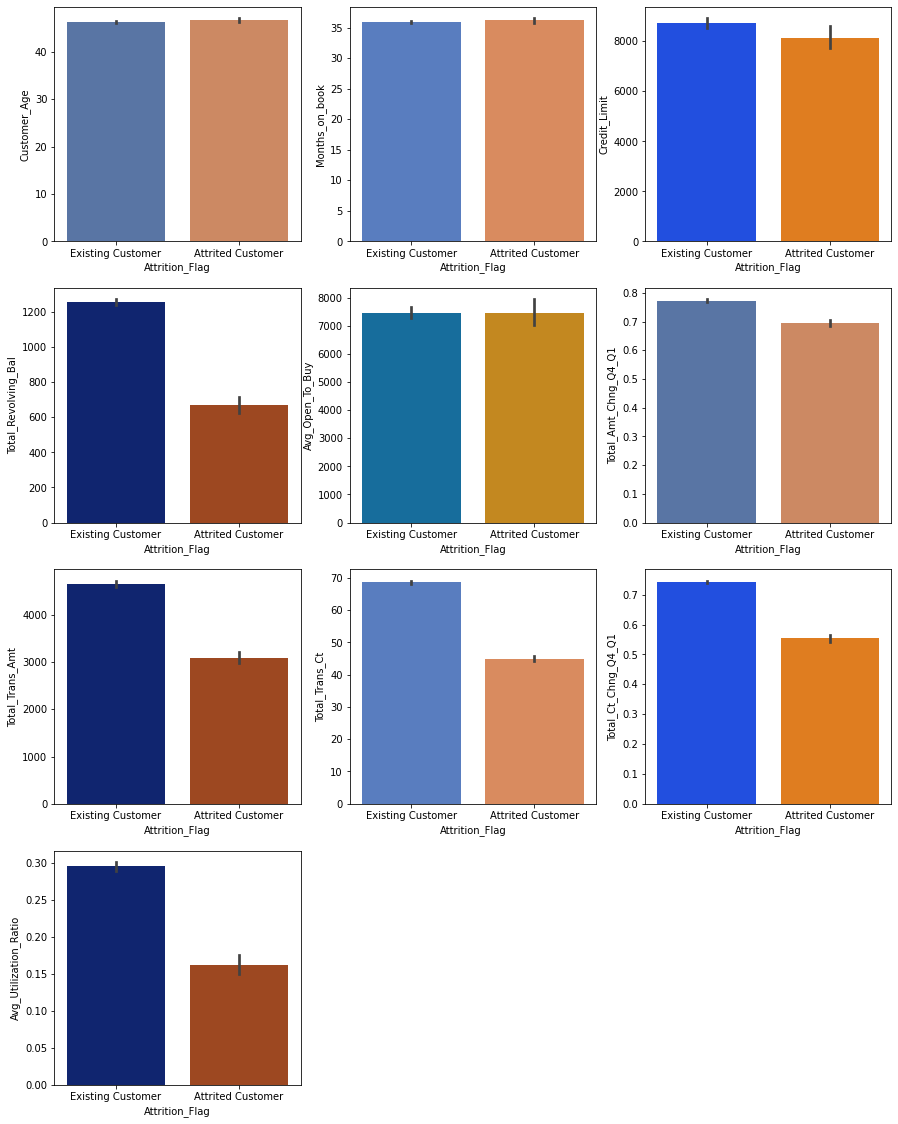

In [14]:
plt.figure(figsize=(15,25))
a = 5
b = 3
c = 1

color = ['deep' ,'muted', 'bright','dark', 'colorblind', 'deep','dark', 
         'muted', 'bright','dark', 'colorblind', 'deep','bright','dark']
for i,feature in enumerate(num_features):
    plt.subplot(a,b,c)
    mean = df.groupby('Attrition_Flag')[feature].mean()
    sns.barplot(x=df.Attrition_Flag, y = df[feature], palette=color[i])
    c=c+1
    
plt.show()

<br>The charts above show how the mean values of the continuous variables change according to the response variable churn. according to the plot above <b>Age, months on book, and average open to buy</b> don't appear to have any impact on whether the customer leave or not. However, the variables like <b>Total_Revolving_Bal, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt</b> seem to have an effect on the response variable.<br><br>

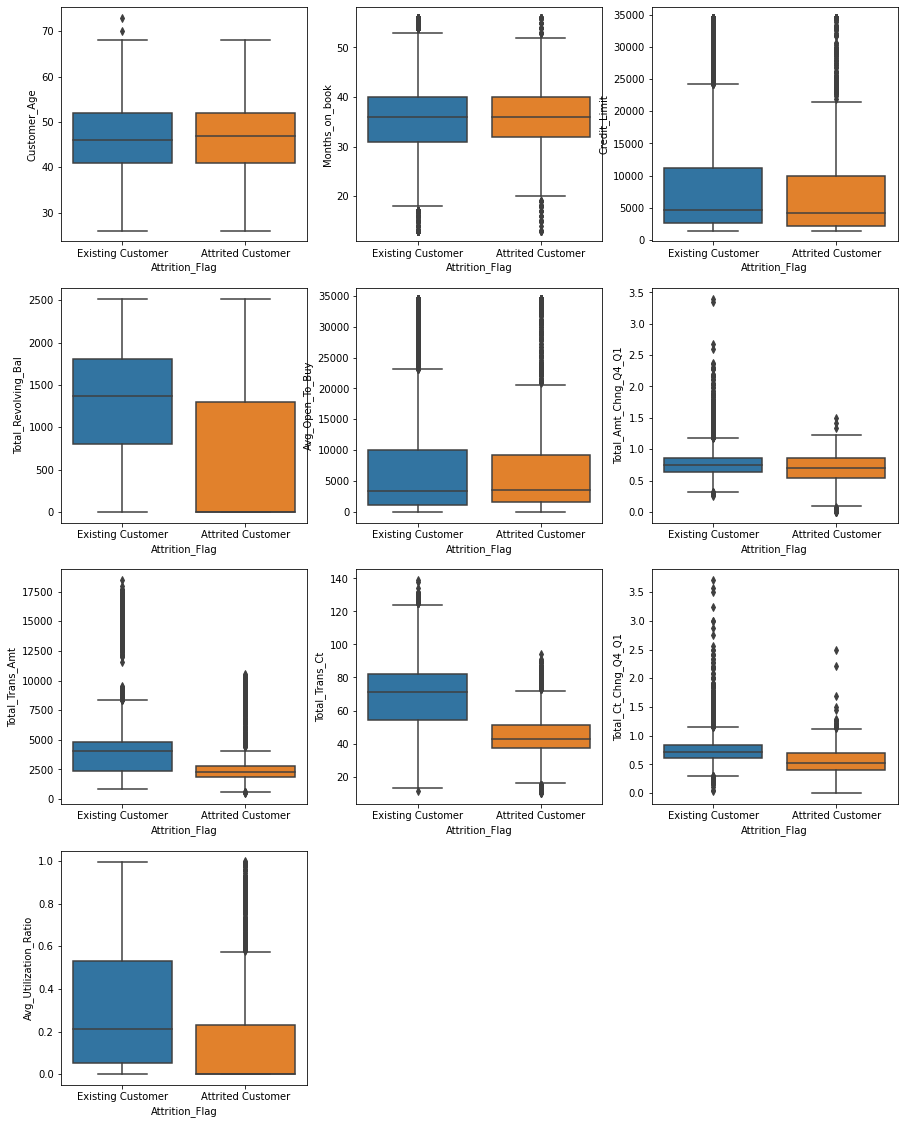

In [15]:
plt.figure(figsize=(15,25))
a = 5
b = 3
c = 1

for feature in num_features:
    plt.subplot(a,b,c)
    sns.boxplot(y=df[feature],x=df.Attrition_Flag)
    c=c+1
    
plt.show()

### Correlation

<AxesSubplot:>

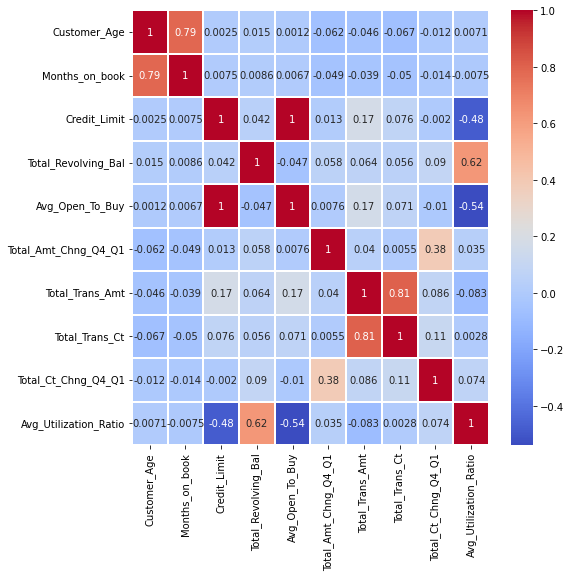

In [16]:
plt.figure(figsize=(8,8))
corr = df[num_features].corr()
sns.heatmap(corr, cmap='coolwarm', annot=True,linewidths=0.1)

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Total_Trans_Amt'>

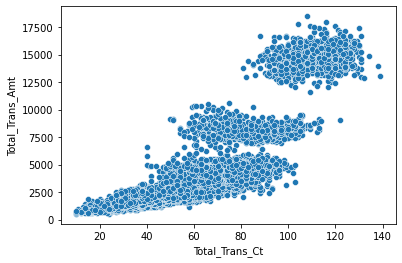

In [17]:
sns.scatterplot(x=df.Total_Trans_Ct, y=df.Total_Trans_Amt)

<AxesSubplot:xlabel='Months_on_book', ylabel='Customer_Age'>

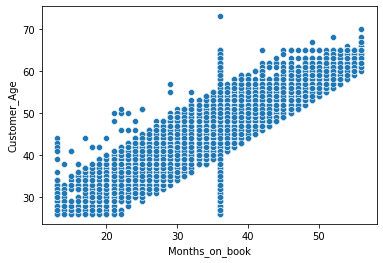

In [18]:
sns.scatterplot(x=df.Months_on_book, y=df.Customer_Age)

<br>Multicollinearity exists hence it’s important to use methods that will minimize the impact of multicollinearity for the model.<br><br>

# Feature engineering

## Removing unknown category from Education_Level

In [19]:
df = df[df.Education_Level!='Unknown']
df.shape

(8608, 20)

## Label encoding on binary category variables

In [20]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df.Gender = encoder.fit_transform(df.Gender)
df.Attrition_Flag = encoder.fit_transform(df.Attrition_Flag)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,1,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,0,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,1,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,0,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,1,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## One hot encoding on nominal variables

In [21]:
df_married = pd.get_dummies(df.Marital_Status)
df = pd.concat([df,df_married], axis=1)
df = df.drop('Marital_Status',axis=1)
df_Card_Category = pd.get_dummies(df.Card_Category)
df = pd.concat([df,df_Card_Category], axis=1)
df = df.drop('Card_Category',axis=1)

## Categorical encoding on ordinal variables

In [22]:
import category_encoders as ce
import pandas as pd

encoder_Income_Category= ce.OrdinalEncoder(cols=['Income_Category'],return_df=True,
                           mapping=[{'col':'Income_Category',
'mapping':{'Unknown':0,'Less than $40K':1,'$40K - $60K':2,'$60K - $80K':3,'$80K - $120K':4,'$120K +':5}}])

df = encoder_Income_Category.fit_transform(df)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Divorced,Married,Single,Unknown,Blue,Gold,Platinum,Silver
0,1,45,1,3,High School,3,39,5,1,3,...,1.625,0.061,0,1,0,0,1,0,0,0
1,1,49,0,5,Graduate,1,44,6,1,2,...,3.714,0.105,0,0,1,0,1,0,0,0
2,1,51,1,3,Graduate,4,36,4,1,0,...,2.333,0.000,0,1,0,0,1,0,0,0
3,1,40,0,4,High School,1,34,3,4,1,...,2.333,0.760,0,0,0,1,1,0,0,0
4,1,40,1,3,Uneducated,3,21,5,1,0,...,2.500,0.000,0,1,0,0,1,0,0,0


In [23]:
encoder_Education_Level= ce.OrdinalEncoder(cols=['Education_Level'],return_df=True,
                           mapping=[{'col':'Education_Level',
'mapping':{'Uneducated':1,'High School':2,'College':3,'Graduate':4,'Post-Graduate':5,'Doctorate':6}}])

df = encoder_Education_Level.fit_transform(df)
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Divorced,Married,Single,Unknown,Blue,Gold,Platinum,Silver
0,1,45,1,3,2,3,39,5,1,3,...,1.625,0.061,0,1,0,0,1,0,0,0
1,1,49,0,5,4,1,44,6,1,2,...,3.714,0.105,0,0,1,0,1,0,0,0
2,1,51,1,3,4,4,36,4,1,0,...,2.333,0.000,0,1,0,0,1,0,0,0
3,1,40,0,4,2,1,34,3,4,1,...,2.333,0.760,0,0,0,1,1,0,0,0
4,1,40,1,3,1,3,21,5,1,0,...,2.500,0.000,0,1,0,0,1,0,0,0


# Feature selection

In [24]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## XGBoost

C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.colum

[14:21:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


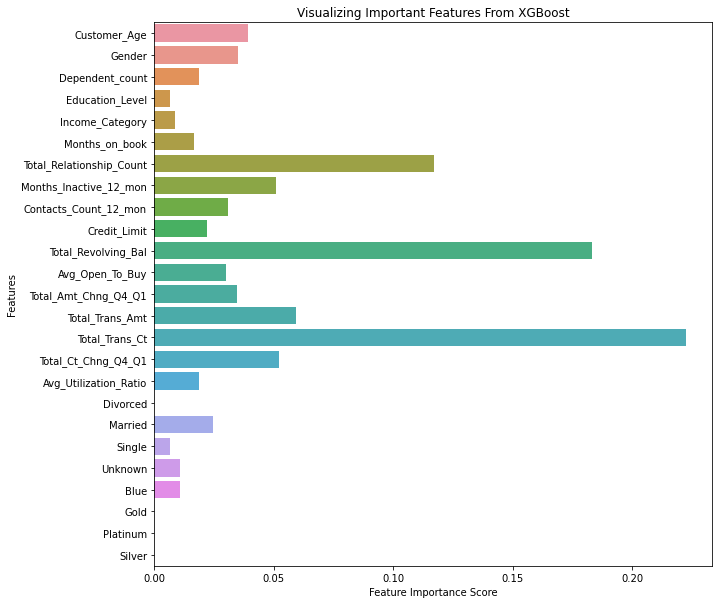

In [25]:
plt.figure(figsize=(10, 10))
import xgboost
from xgboost import XGBClassifier
xgboost =XGBClassifier()
xgboost.fit(X_train,y_train)
feature_imp2 = xgboost.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From XGBoost")
plt.show()

## Random forest

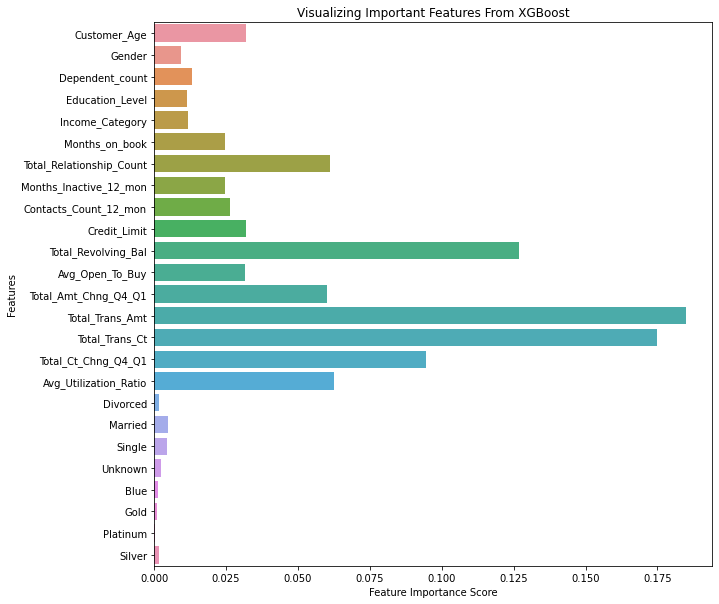

In [26]:
plt.figure(figsize=(10, 10))
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
rf.fit(X_train,y_train)
feature_imp2 = rf.feature_importances_
sns.barplot(x=feature_imp2, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features From XGBoost")
plt.show()

# Model Building

## Handling imbalanced data

In [27]:
X = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, random_state = 0)

## Logistic regression

In [28]:
from sklearn.preprocessing import StandardScaler# not necassary however Feature Scaling will improve the results
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scale, y_train)

LogisticRegression()

In [29]:
y_pred = classifier.predict(X_test_scale)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1320  137]
 [ 134 1304]]


0.9063903281519862

## KNN

In [31]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)#n_neighbors- no of points we consider near the new point,metric ='minkowski' and p=2 better be this value to apply euclidean distance 
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1377   80]
 [ 209 1229]]


0.9001727115716753

## Naive bayes

In [33]:
from sklearn.preprocessing import StandardScaler# not necassary however Feature Scaling will improve the results
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [34]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1283  174]
 [ 330 1108]]


0.8259067357512954

## Decision tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1410   47]
 [  95 1343]]


0.9509499136442142

## Random forest

In [36]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[[1440   17]
 [  48 1390]]


0.9775474956822107

## XGBoost

In [37]:
from xgboost import XGBClassifier
xgboost =XGBClassifier(use_label_encoder = False)
xgboost.fit(X_train,y_train)

y_pred = xgboost.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

[14:21:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\HP\anaconda3\envs\tensorflow\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[[1440   17]
 [  28 1410]]


0.9844559585492227

As can be seen from above, all the models performed pretty well. However, we decided to stick with <b>Decision Tree, Random Forest and XGBoost models</b> and work on enhancing them.


# Hyperparameter tuning

## Random search

In [ ]:
from sklearn.model_selection import KFold, RepeatedKFold, GridSearchCV, cross_validate, train_test_split,RandomizedSearchCV

### Decision tree

<b>best</b><br>
1. 'max_depth': 152
2. 'min_samples_split': 482

In [ ]:
dt = DecisionTreeClassifier(random_state=0)

criterion = ['gini','entropy', 'log_loss']
splitter = ['best', 'random']
min_samples_split = [i for i in range(2,1000,5) ]
min_samples_leaf = [i for i in range(1,1000,5) ]
max_depth = [i for i in range(0,1000,5)]
max_features = ['auto', 'sqrt', 'log2']
max_leaf_nodes= [i for i in range(0,1000,5)]


random_grid = {'criterion':criterion,
               'min_samples_split':min_samples_split,
               'splitter':splitter,
               'min_samples_leaf':min_samples_leaf,
               'max_features':max_features,
               'max_depth':max_depth,
               'max_features':max_features,
               #'max_leaf_nodes':max_leaf_nodes
              }

dt_random = RandomizedSearchCV(estimator=dt,
                              param_distributions=random_grid,
                               n_iter=10, cv = 5,verbose=2,
                               scoring='accuracy',
                               error_score='raise',
                               n_jobs= 1)



In [ ]:
dt_gridfit = dt_random.fit(X_train,y_train)

In [ ]:
dt_gridfit.best_params_, dt_gridfit.best_score_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(splitter='best',
                                    min_samples_split = 552,
                                    min_samples_leaf = 126,
                                    max_features = 'sqrt',
                                    max_depth = 480,
                                    criterion = 'log_loss')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm) 
accuracy_score(y_test, y_pred)

## Grid search

### Random forest

In [12]:
parameters ={#'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
     'criterion' : ['gini', 'entropy'],
     'max_features': [0.3,0.5,0.7,0.9],
     'min_samples_leaf': [3,5,7,10,15],
     #'min_samples_split': [2,5,10],
     'n_estimators': [50,100,200,400,600]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = RandomForestClassifier()
grid_search = GridSearchCV(
    grid_search, 
    parameters, 
    cv=5,
    scoring='accuracy',n_jobs=-1)

In [ ]:
grid_result= grid_search.fit(X_train, y_train)

In [ ]:
print('Best Params: ', grid_result.best_params_)
print('Best Score: ', grid_result.best_score_)